In [ ]:
# Import all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
df=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [96]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [98]:
df.shape

(4340, 8)

In [99]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [100]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [101]:
# Getting just car names
df["carNames"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['carNames']

,carNames
0,Maruti
1,Maruti
2,Hyundai
3,Datsun
4,Honda
...,...
4335,Hyundai
4336,Hyundai
4337,Maruti
4338,Hyundai


In [102]:
df.carNames.value_counts()

,count
carNames,
Maruti,1280
Hyundai,821
Mahindra,365
Tata,361
Honda,252
Ford,238
Toyota,206
Chevrolet,188
Renault,146


<ipython-input-103-f346c29ff92d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




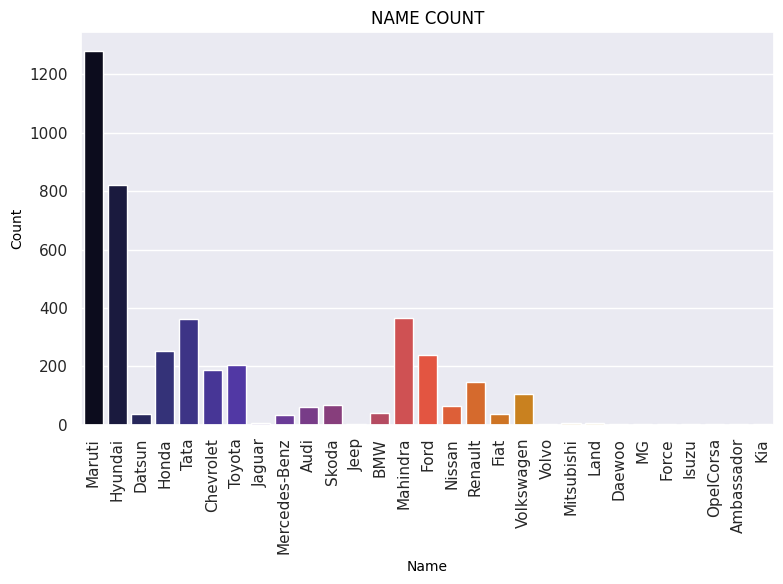

In [103]:
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed
sns.countplot(data=df, x="carNames", palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name", fontsize=10, color="black")
plt.ylabel("Count", fontsize=10, color="black")
plt.title("NAME COUNT", color="black")
plt.tight_layout()
plt.show()


The most popular car model is Maruti, produced by Maruti Suzuki India Limited—an automobile company headquartered in New Delhi, previously known as Maruti Udyog Limited.

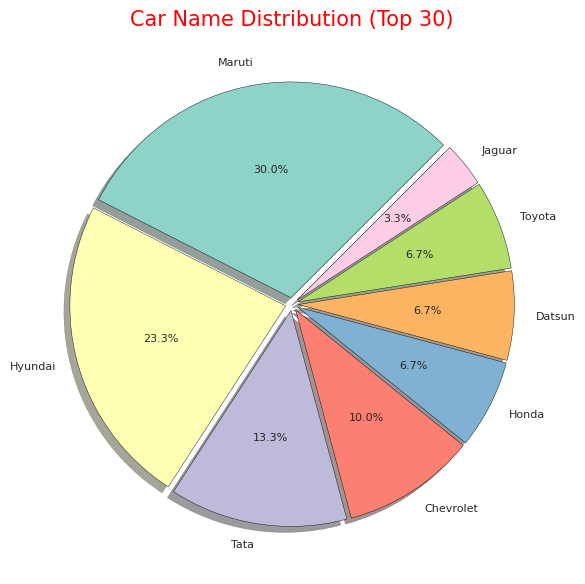

In [104]:
labels = df["carNames"][:30].value_counts().index
sizes = df["carNames"][:30].value_counts()

colors = [
    "#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462",
    "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f"
]

explode = [0.03] * len(sizes)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors[:len(sizes)], shadow=True, startangle=45, explode=[0.03] * len(sizes), textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'black', 'linewidth': 0.3})
plt.title('Car Name Distribution (Top 30)', color='red', fontsize=15)
plt.tight_layout()
plt.show()


**The most common car model is Maruti, as shown in both the pie chart and the accompanying table.**

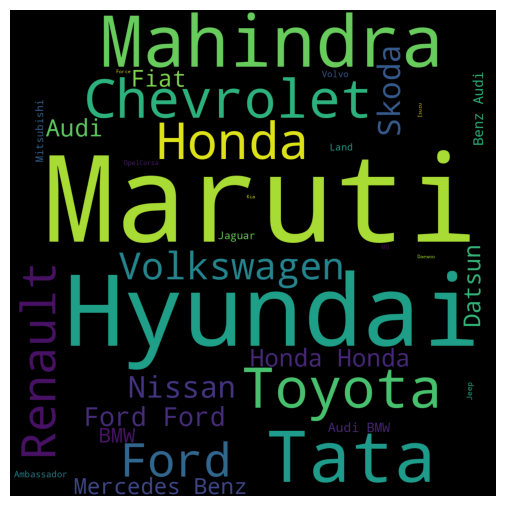

In [105]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['carNames'])
plt.rcParams['figure.figsize'] = (8,6)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

**Maruti remained the most frequent car brand, with Hyundai close behind, as shown in the word cloud.**

In [106]:
df.year.value_counts()

,count
year,
2017,466
2015,421
2012,415
2013,386
2014,367
2018,366
2016,357
2011,271
2010,234


<ipython-input-107-cb3c5097dcce>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




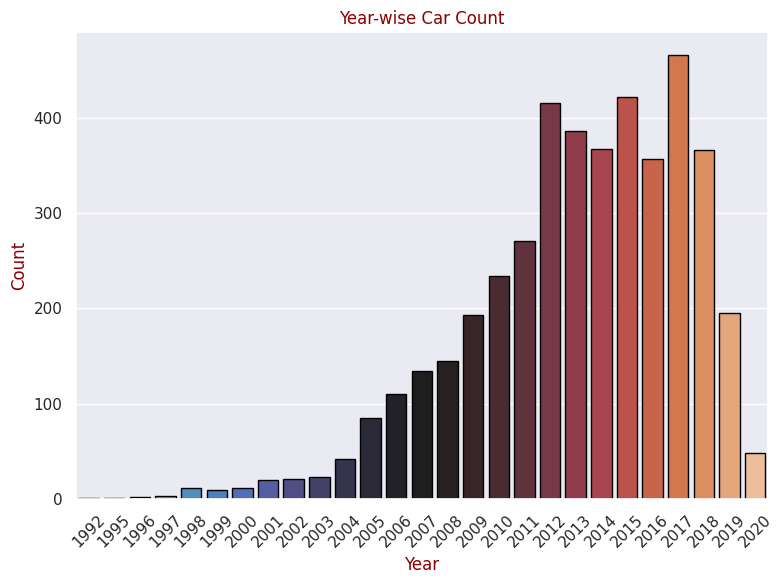

In [107]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="year", palette="icefire", edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Year", color="darkred")
plt.ylabel("Count", color="darkred")
plt.title("Year-wise Car Count", color="darkred")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

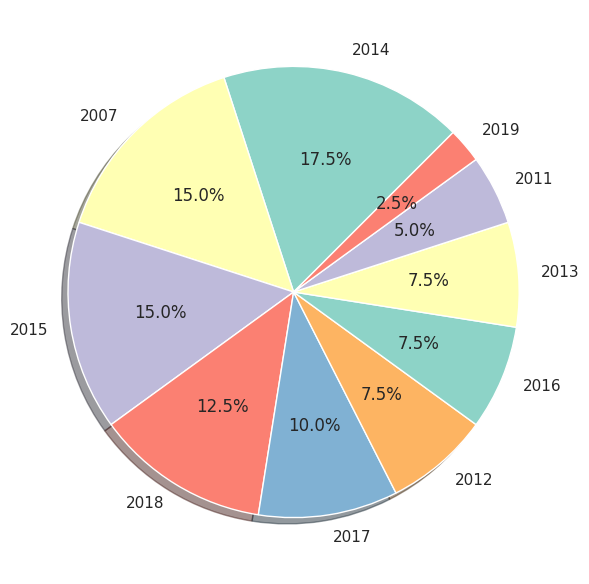

In [108]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6)); plt.pie(df["year"][:40].value_counts(), labels=df["year"][:40].value_counts().index, autopct='%1.1f%%', colors=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462'] * 10, startangle=45, shadow=True)
plt.tight_layout()
plt.show()


In [109]:
df.fuel.value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


**The table shows that the most common fuel type is diesel, followed by petroleum.**

In [110]:
df.seller_type.value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


<ipython-input-111-acb5c274e468>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




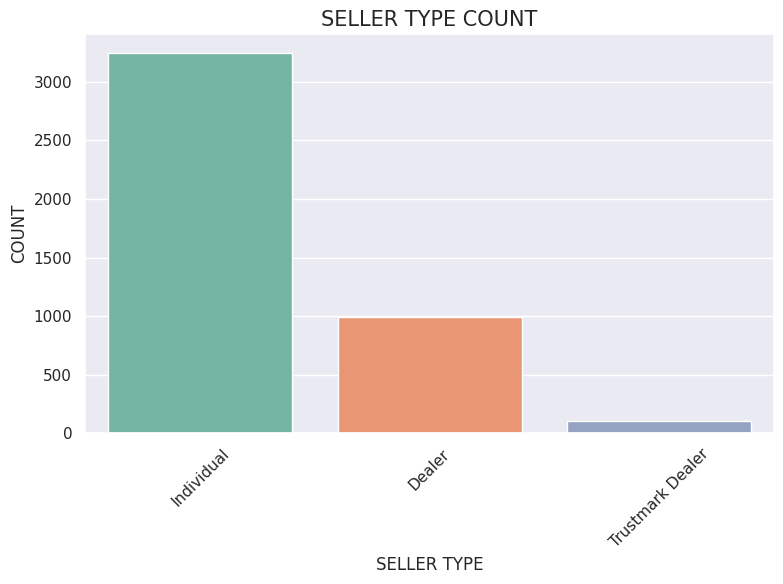

In [111]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="seller_type", palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("SELLER TYPE", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.title("SELLER TYPE COUNT", fontsize=15)
plt.tight_layout()
plt.show()


**This chart shows the distribution of sales, with individual sales being the most frequent**

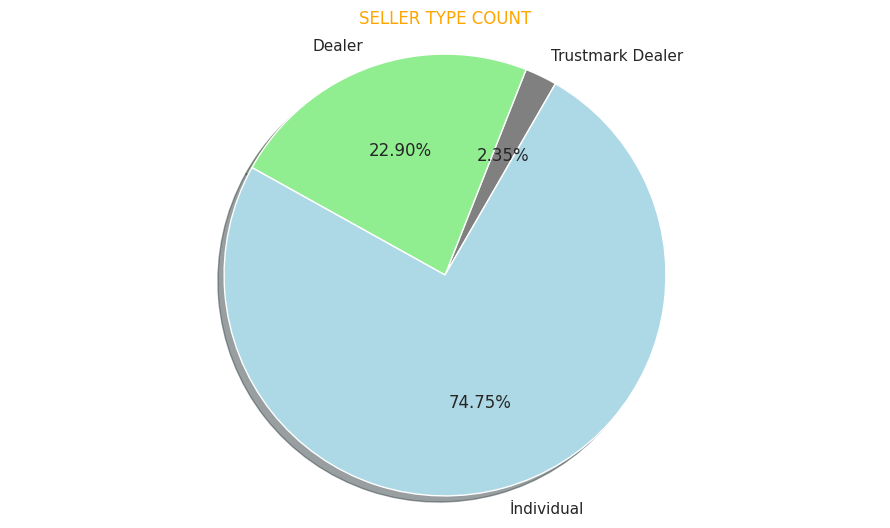

In [112]:
plt.figure(figsize=(10, 6))
labels=["Trustmark Dealer","Dealer","İndividual"]
plt.pie(df['seller_type'].value_counts().sort_values(), labels=labels,explode=[0,0,0], autopct='%1.2f%%', colors=['gray','lightgreen',"lightblue"], startangle=60,shadow=True)
plt.title("SELLER TYPE COUNT",color="orange")
plt.axis('equal')
plt.show()

**This is the pie chart showing where the sales were made. Individual sales are highest.**

In [113]:
df.transmission.value_counts()

,count
transmission,
Manual,3892
Automatic,448


<ipython-input-114-25ac4e55f7e5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




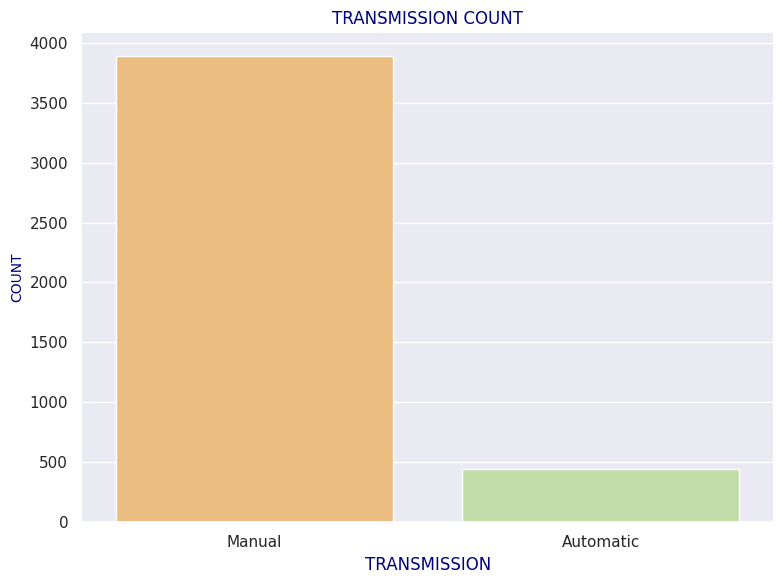

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="transmission", palette="Spectral")
plt.xlabel("TRANSMISSION", fontsize=12, color="navy")
plt.ylabel("COUNT", fontsize=10, color="navy")
plt.title("TRANSMISSION COUNT", color="navy", fontsize=12)
plt.tight_layout()
plt.show()


**This chart displays the distribution of cars by transmission type, with most cars being manual.**

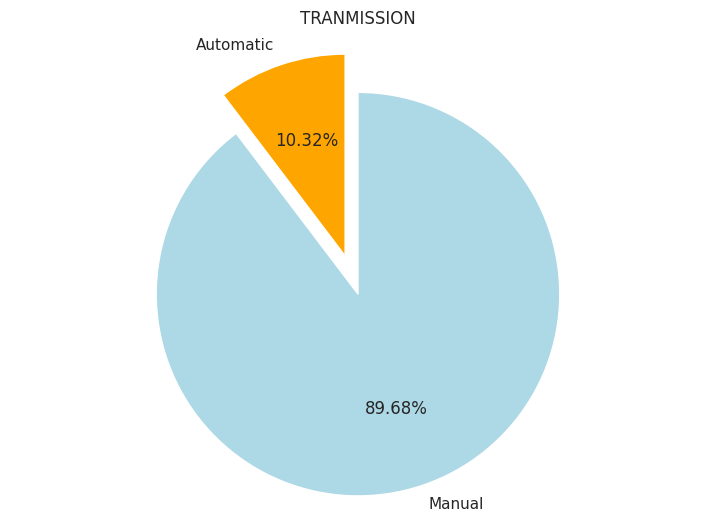

In [115]:
plt.figure(figsize=(8, 6))
labels=['Automatic', 'Manual']
plt.pie(df['transmission'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1], autopct='%1.2f%%',colors=['orange','lightblue'], startangle=90)
plt.title('TRANMISSION')
plt.axis('equal')
plt.show()

**This chart displays the distribution of cars by transmission type, with a pie chart showing that most cars are manual.**

In [116]:
df.owner.value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


<ipython-input-117-049b44a2a705>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




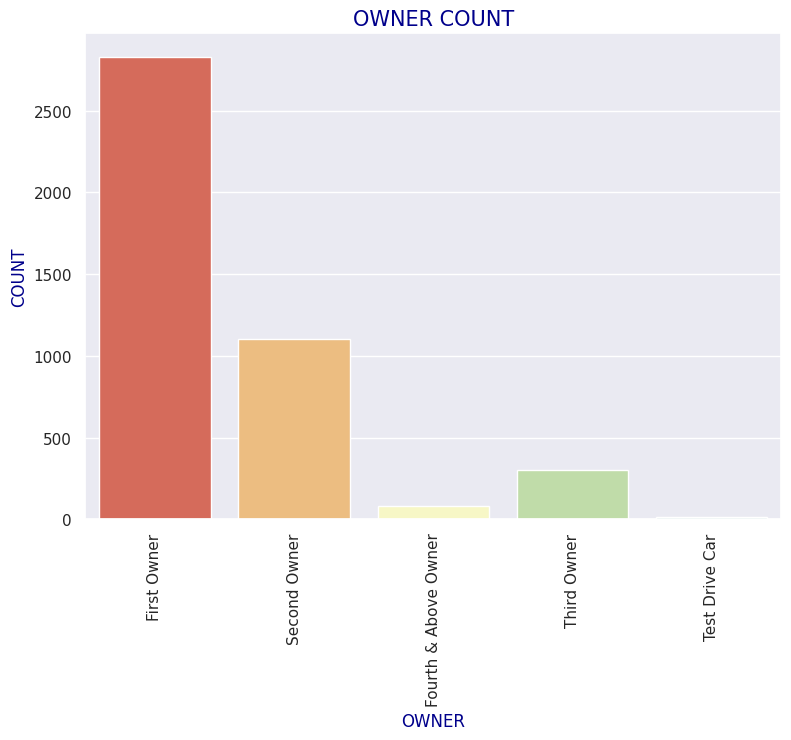

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="owner", palette="Spectral")
plt.xticks(rotation=90)
plt.xlabel("OWNER", fontsize=12, color="darkblue")
plt.ylabel("COUNT", fontsize=12, color="darkblue")
plt.title("OWNER COUNT", color="darkblue", fontsize=15)
plt.show()


**The above chart shows that most sellers are selling first-hand (new) cars.**

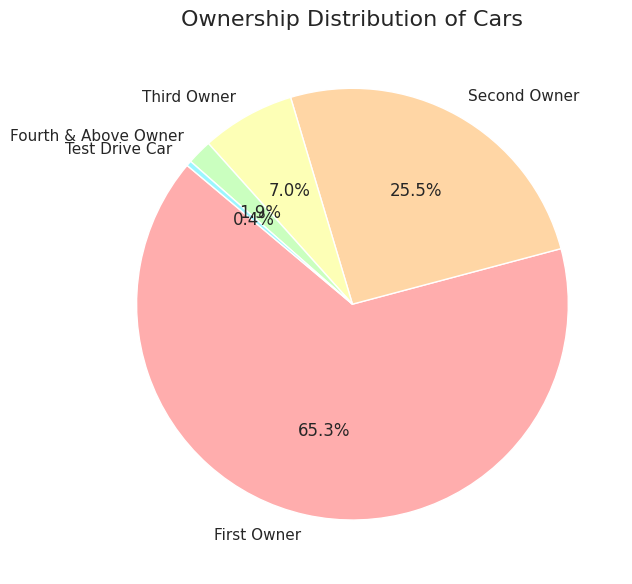

In [118]:
plt.figure(figsize=(8, 6))
plt.pie(df["owner"].value_counts(), labels=df["owner"].value_counts().index, autopct='%1.1f%%', colors=['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff'][:len(df["owner"].value_counts())], startangle=140)
plt.title('Ownership Distribution of Cars', fontsize=16)
plt.tight_layout()
plt.show()


**This pie chart illustrates the ownership distribution of cars, showing that the majority (65.3%) are first-owner vehicles**

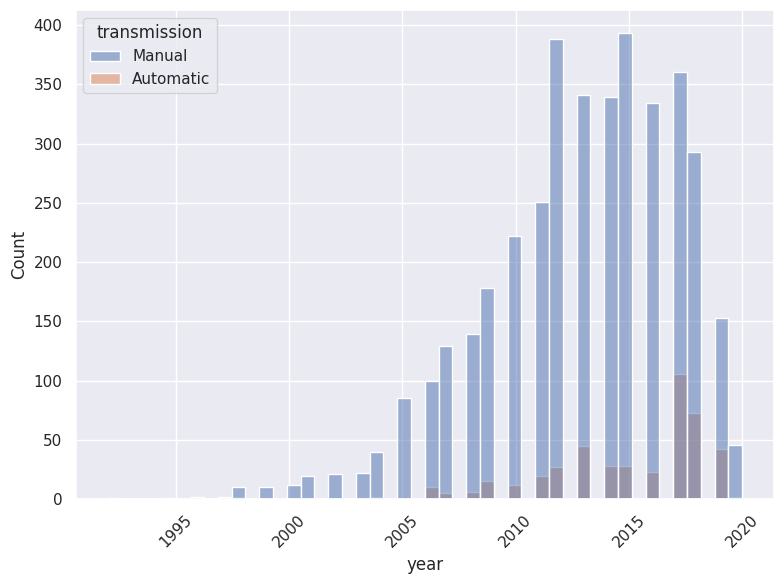

In [119]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**This histogram shows the distribution of manual and automatic cars over the years.**

In [120]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,carNames
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [121]:
df1 = df.groupby(["transmission","fuel","carNames"],as_index=False)[['selling_price']].median().rename(columns={'selling_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","carNames"], values ='price', color='carNames', color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

This is a treemap chart showing the distribution of automatic diesel cars categorized by brand.

From the visual, it's clear that:

Mercedes-Benz, Land Rover, and BMW occupy the largest blocks, indicating they have the highest number of automatic diesel cars.

Other notable brands include Toyota, Jaguar, and Ford, followed by Honda, Audi, and more.

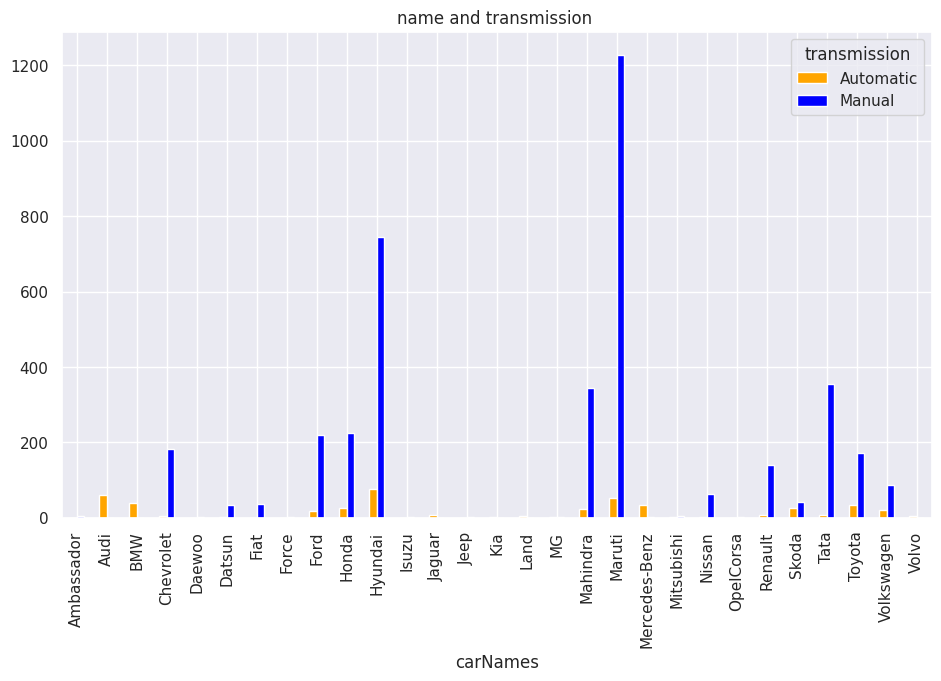

In [122]:
pd.crosstab(df["carNames"], df["transmission"]).plot(kind="bar", figsize=(10, 6), color=["orange","blue"], title="name and transmission ")
plt.show()

**This table is a crosstab displaying the distribution of car models based on transmission type—automatic and manual.**

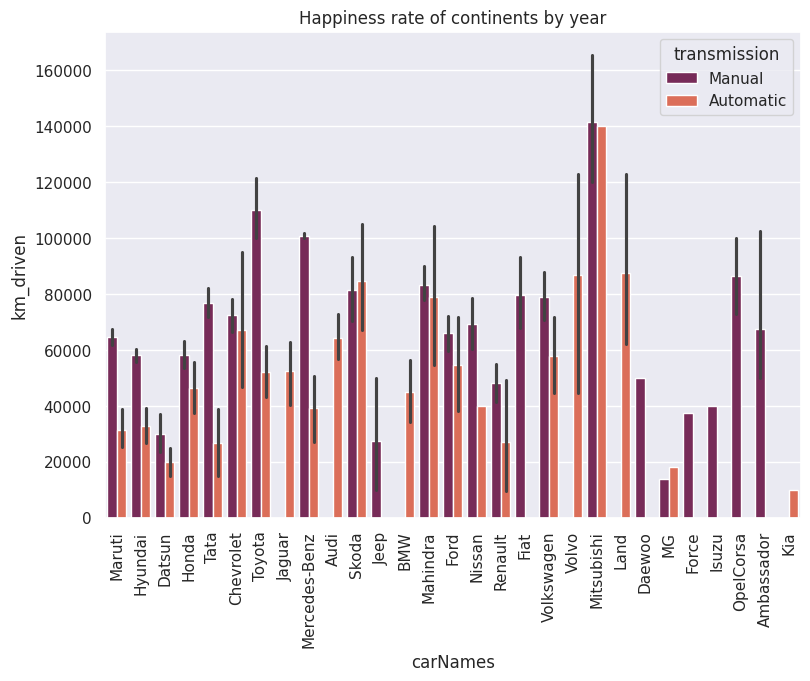

In [123]:
plt.figure(figsize=(8, 6))
plt.title("Happiness rate of continents by year")
sns.barplot(data=df, x="carNames", y="km_driven", hue="transmission", palette="rocket")
plt.xticks(rotation=90)
plt.show()


**This bar chart represents the mileage (km driven) of different car models, categorized by transmission type**

<Axes: >

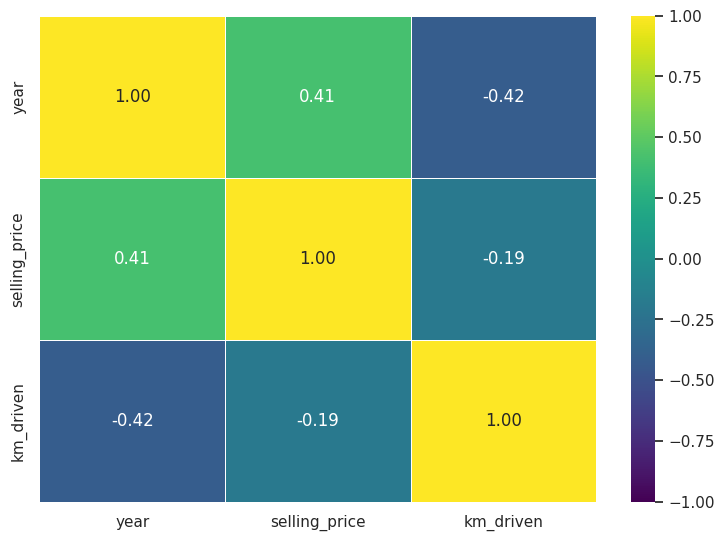

In [124]:
fig, ax = plt.subplots(figsize=(8,6))
corr1 = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

**This heatmap displays the correlation between numerical features in the dataset**

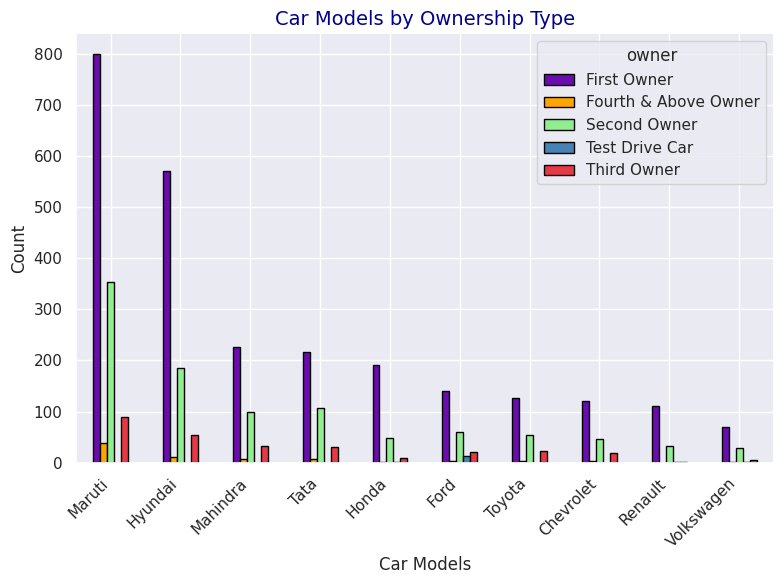

In [125]:
crosstab_data = pd.crosstab(df["carNames"], df["owner"])

# Keeping only top 10 car names
top_car_names = df["carNames"].value_counts().nlargest(10).index
crosstab_data = crosstab_data.loc[top_car_names]
crosstab_data.plot(kind="bar", figsize=(8, 6), color=["#6a0dad", "#ffa500", "#90ee90", "#4682b4", "#e63946"], edgecolor='black')
plt.title("Car Models by Ownership Type", fontsize=14, color='darkblue')
plt.xlabel("Car Models", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**This bar chart shows the distribution of car models by ownership type—first, second, third, fourth and above, and test vehicles.**

In [126]:
joint_data = df.sort_values(by='year', ascending=False)

top_rated = joint_data[:2500]
fig = px.sunburst(top_rated, path=['year', 'carNames'], values='year', color='year', color_continuous_scale='Cividis')
fig.update_layout(title='Car Distribution by Year and Model')
fig.update_layout(width=800, height=600)
fig.show()


In [127]:
joint_data=df.sort_values(by='year', ascending=False)

top_rated=joint_data[2500:]
fig =px.sunburst(top_rated, path=['year',"carNames"], values='year', color='year', color_continuous_scale='Plasma')
fig.update_layout(width=800, height=600)
fig.show()

In [128]:
fig = px.strip(df, x='year', y='carNames', color='year', color_discrete_sequence=["#6a0dad", "#ffa500", "#90ee90", "#4682b4", "#e63946"] )
fig.update_layout(width=800, height=600)
fig.show()

<ipython-input-129-72c45b52e3e6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




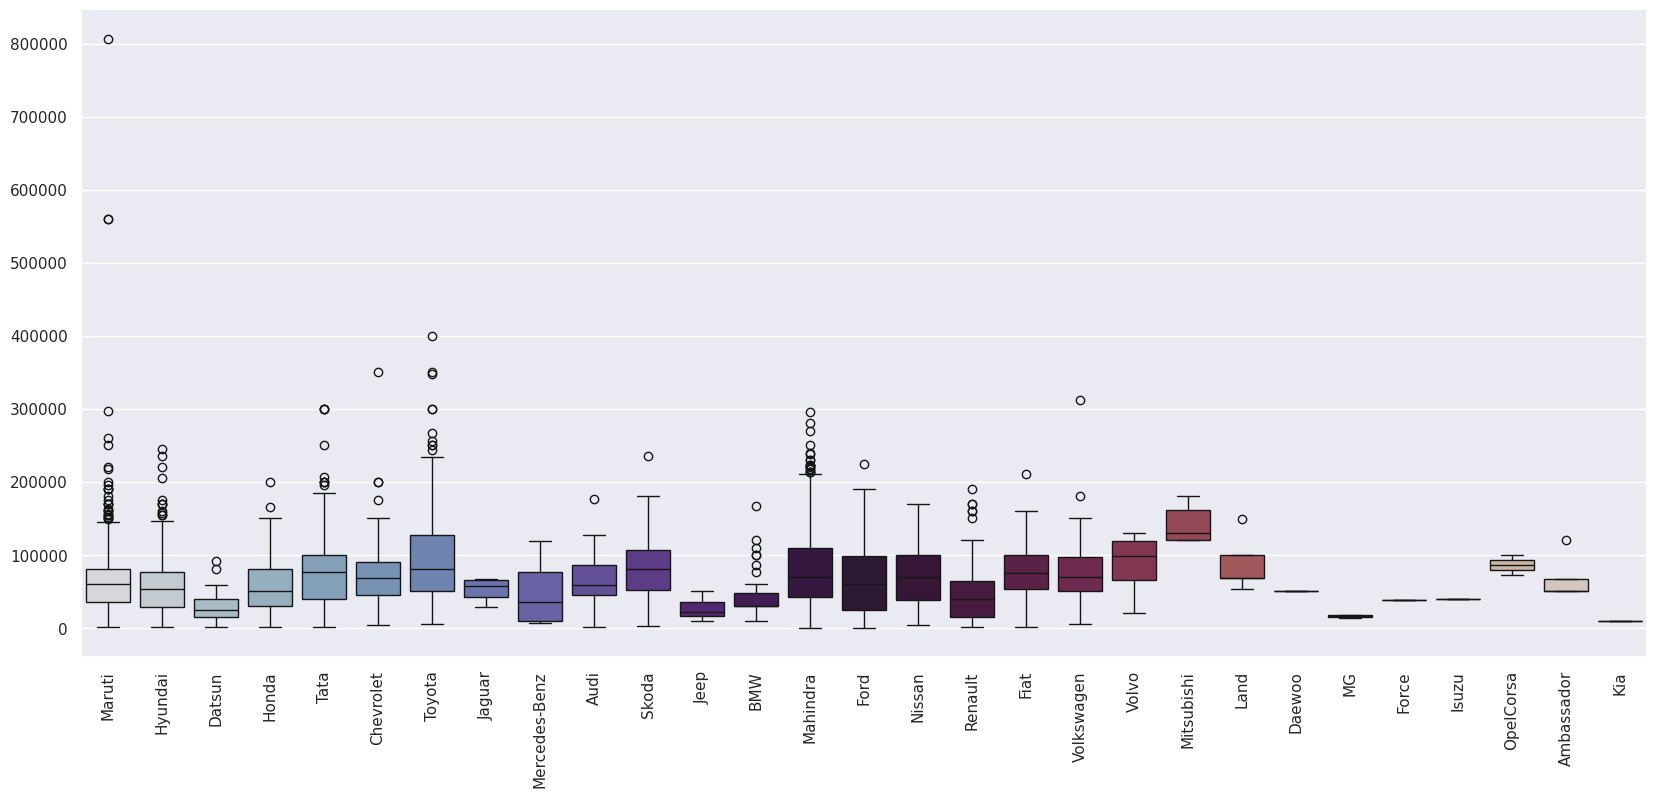

In [129]:
f, ax = plt.subplots(figsize=(18,8))
sns.boxplot(x=df["carNames"].values, y = df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

**This boxplot shows the distribution of kilometers driven across different car brands (carNames)**



<h3 style="color: darkorange;">🔥 Analysis Summary</h3>


Maruti is the best-selling car brand, followed by Hyundai.

The majority of vehicles are manual transmission.

Most cars are sold as first-hand, with second-hand sales being the next most common.

The majority of transactions are made through individual sellers.

2017 stands out as the year with the highest number of car sales.

This indicates that vehicle production was particularly high in 2017.